In [68]:
import glob
import os
import numpy as np
from plyfile import PlyData
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [69]:
# genrate ground truth


In [70]:
# Set up directories
pred_dir = 'DGNet_test/predictions'               # Ground truth PLY files
gt_dir= 'DGNet_test/ground_truth'      # TXT files with predicted labels

# Class names for classification report
class_names = ["head", "neck", "torso", "left_arm", "right_arm", "hip", "legs"]

# Storage
accuracies = []
f1_scores = []
all_true_labels = []
all_predicted_labels = []

# Load each file
ply_paths = sorted(glob.glob(os.path.join(gt_dir, '*.ply')))

In [71]:
for ply_path in ply_paths:
    file_name = os.path.splitext(os.path.basename(ply_path))[0]
    pred_path = os.path.join(pred_dir, file_name + '.txt')

    # Load ground truth from PLY
    ply_data = PlyData.read(ply_path)
    true_labels = np.array(ply_data['vertex']['label'])

    # Load predicted labels
    predicted_labels = np.loadtxt(pred_path, dtype=np.int64)
    # turn flawed labels (0) to legs
    predicted_labels[predicted_labels == 0] = 7
    # subtract 1 from all labels
    predicted_labels -= 1

    assert len(true_labels) == len(predicted_labels), f"Label length mismatch in {file_name}"

    # Compute metrics
    acc = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Save for aggregation
    accuracies.append(acc)
    f1_scores.append(f1)
    all_true_labels.append(true_labels)
    all_predicted_labels.append(predicted_labels)

    # Per-sample report
    print(f"File: {file_name} | Accuracy: {acc * 100:.2f}% | F1 Score: {f1:.4f}")
# Summary
avg_acc = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)

print(f"\n Average Accuracy: {avg_acc * 100:.2f}%")
print(f" Average F1 Score: {avg_f1:.4f}\n")

File: raw_55 | Accuracy: 92.32% | F1 Score: 0.9223
File: raw_56 | Accuracy: 91.56% | F1 Score: 0.9121
File: raw_57 | Accuracy: 70.13% | F1 Score: 0.7029
File: raw_58 | Accuracy: 91.24% | F1 Score: 0.9126
File: raw_59 | Accuracy: 92.53% | F1 Score: 0.9246
File: raw_60 | Accuracy: 93.00% | F1 Score: 0.9293

 Average Accuracy: 88.46%
 Average F1 Score: 0.8840



In [72]:
# Classification report
all_true_labels = np.concatenate(all_true_labels)
all_predicted_labels = np.concatenate(all_predicted_labels)

print(classification_report(all_true_labels, all_predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

        head       0.93      0.97      0.95     26152
        neck       0.79      0.61      0.69      5634
       torso       0.92      0.91      0.92     61715
    left_arm       0.85      0.85      0.85     35175
   right_arm       0.76      0.83      0.79     24297
         hip       0.84      0.84      0.84     21949
        legs       0.93      0.90      0.92     31329

    accuracy                           0.88    206251
   macro avg       0.86      0.84      0.85    206251
weighted avg       0.88      0.88      0.88    206251



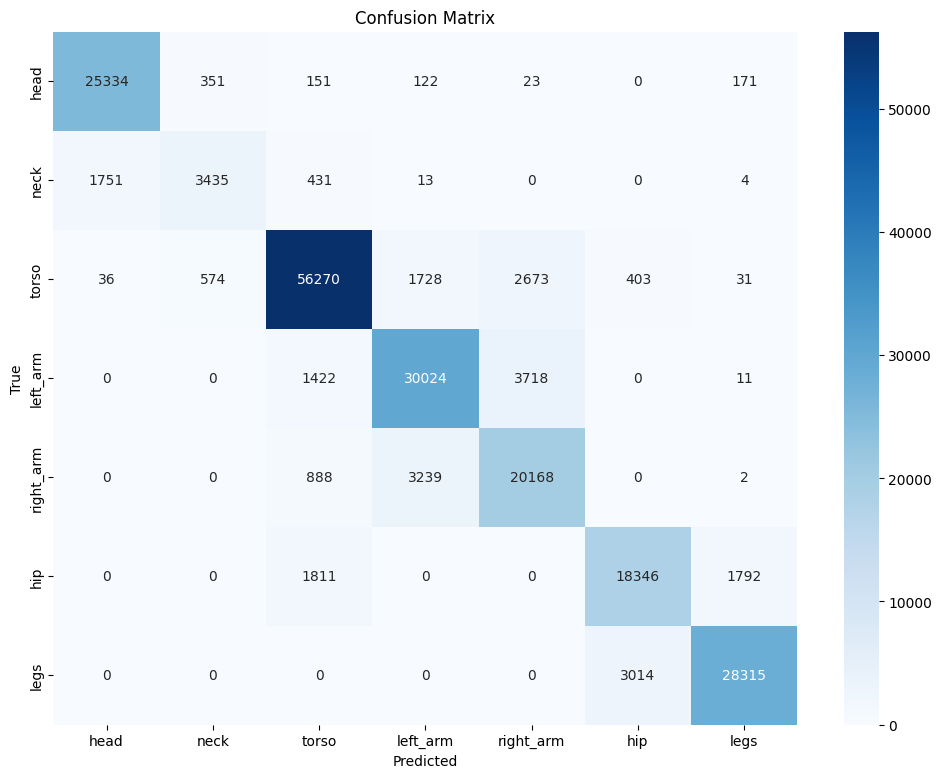

In [65]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

# Plot
plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()